In [4]:
import networkx as nx
import matplotlib.pyplot as plt

In [9]:
def color_map(graph, colors):
    color_of = {}
    
    def validate_color(node, color):
        for neighbor in graph[node]:
            color_of_neighbor = color_of.get(neighbor)
            if color_of_neighbor == color:
                return False
        return True
    
    def assign_color_for_node(node):
        for color in colors:
            if validate_color(node, color):
                yield color
    
    def color_nodes(nodes):
        if not nodes:
            return True
        node = nodes[0]
        for color in assign_color_for_node(node):
            color_of[node] = color
            if color_nodes(nodes[1:]):
                return True
            color_of[node] = None
        return False
    
    nodes = list(graph.keys())
    if color_nodes(nodes):
        return color_of

In [10]:
def draw_graph(graph,color_of):
    G = nx.Graph(graph)
    node_colors = [color_of[node] for node in G.nodes]
    
    nx.draw(G, with_labels = True, node_color = node_colors, node_size = 600)

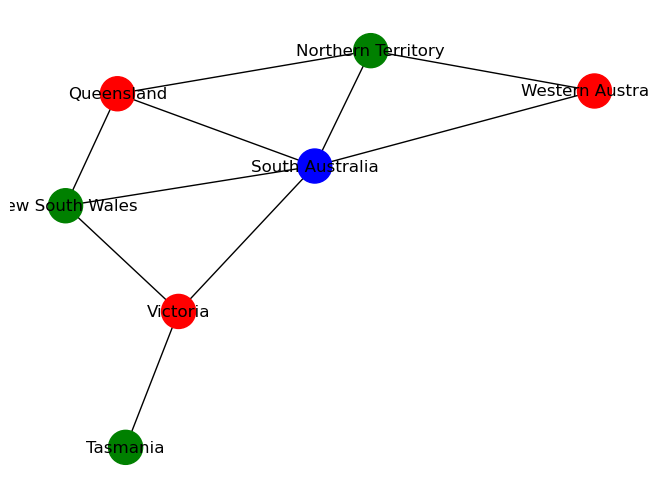

In [11]:
colors = ['red','green','blue']

graph = {
    'Western Australia': ['Northern Territory', 'South Australia'],
    'Northern Territory': ['Western Australia', 'South Australia', 'Queensland'],
    'South Australia': ['Western Australia', 'Northern Territory', 'Queensland', 'New South Wales', 'Victoria'],
    'Queensland': ['Northern Territory', 'South Australia', 'New South Wales'],
    'New South Wales': ['Queensland', 'South Australia', 'Victoria'],
    'Victoria': ['South Australia', 'New South Wales', 'Tasmania'],
    'Tasmania': ['Victoria']
}

coloring = color_map(graph,colors)
draw_graph(graph, coloring)

In [5]:
def is_valid(board, row, col, num):
    # Check if the number is not already in the current row
    for x in range(9):
        if board[row][x] == num:
            return False

    # Check if the number is not already in the current column
    for x in range(9):
        if board[x][col] == num:
            return False

    # Check if the number is not already in the current 3x3 box
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(3):
        for j in range(3):
            if board[i + start_row][j + start_col] == num:
                return False

    return True




Sudoku Solved:
5 3 4 | 6 7 8 | 9 1 2 
6 7 2 | 1 9 5 | 3 4 8 
1 9 8 | 3 4 2 | 5 6 7 
---------------------
8 5 9 | 7 6 1 | 4 2 3 
4 2 6 | 8 5 3 | 7 9 1 
7 1 3 | 9 2 4 | 8 5 6 
---------------------
9 6 1 | 5 3 7 | 2 8 4 
2 8 7 | 4 1 9 | 6 3 5 
3 4 5 | 2 8 6 | 1 7 9 


In [6]:
##sudoku 

def solve_sudoku(board):
    for i in range(9):
        for j in range(9):
            # If the current cell is empty
            if board[i][j] == 0:
                # Try placing numbers 1-9
                for num in range(1, 10):
                    # Check if the number is valid in this position
                    if is_valid(board, i, j, num):
                        # If valid, place the number and recursively solve the rest of the board
                        board[i][j] = num
                        if solve_sudoku(board):
                            return True
                        # If the solution fails, backtrack and try the next number
                        board[i][j] = 0
                # If none of the numbers 1-9 work, the board is unsolvable
                return False
    # If all cells are filled, the board is solved
    return True

In [7]:
def print_board(board):
    for i in range(9):
        if i % 3 == 0 and i != 0:
            print("-" * 21)
        for j in range(9):
            if j % 3 == 0 and j != 0:
                print("|", end=" ")
            print(board[i][j], end=" ")
        print()


# Example Sudoku board (0 represents empty cells)
board = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

if solve_sudoku(board):
    print("Sudoku Solved:")
    print_board(board)
else:
    print("No solution exists for the given Sudoku board.")


Sudoku Solved:
5 3 4 | 6 7 8 | 9 1 2 
6 7 2 | 1 9 5 | 3 4 8 
1 9 8 | 3 4 2 | 5 6 7 
---------------------
8 5 9 | 7 6 1 | 4 2 3 
4 2 6 | 8 5 3 | 7 9 1 
7 1 3 | 9 2 4 | 8 5 6 
---------------------
9 6 1 | 5 3 7 | 2 8 4 
2 8 7 | 4 1 9 | 6 3 5 
3 4 5 | 2 8 6 | 1 7 9 
